In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pickle
from scipy.ndimage import zoom

In [2]:
# # ------------------------------------------------------------------
# # user‑controlled parameters
# dims        = [7, 7]          # the two “Ls” you want to compare
# n_seeds     = 1               # change if you have more than seed‑0
# mx, my      = 8, 8            # constants used in the folder name
# base_dir    = f"/pscratch/sd/h/hbassi/data250506/VP1-random-fd_dt=0.001"#"/global/cfs/projectdirs/m1027/erikaye/vlasov_random/data250411/VP1-random-fd"
# # ------------------------------------------------------------------

# for seed in range(10):

#     # ----- load both snapshots for this seed --------------------------------
#     data_dict = {}
#     for dim in dims:
#         # path = (f"{base_dir}/mx{mx}my{my}/"
#         #         f"fe_seed{seed}_k0.1_mr25.0_"
#         #         f"Ls{dim:02d},{dim:02d},{dim:02d}_o1_cfl0.9_T1.0_te4.pkl")
#         path = (f"{base_dir}/mx{mx}my{my}/"
#                 f"fe_seed{seed}_k0.1_mr25.0_"
#                 f"Ls{dim:02d},{dim:02d},{dim:02d}_o1_dt0.001_T5.0_te4.pkl")
#         with open(path, "rb") as f:
#             data = pickle.load(f)
#         data_dict[dim] = data[-1]          # shape: (T, Ny, Nx)

#     # consistency check (optional)
#     n_steps = data_dict[dims[0]].shape[0]
#     print(n_steps)

# # ----- draw one figure per time step ------------------------------------
#     for t in range(0, n_steps, 500):
        
#         # ------------------------------------------------------------------
#         # pull out the low‑ and high‑resolution slices for this time step
#         low_dim, high_dim = sorted(dims)          # 7 → low, 8 → high
#         low  = data_dict[low_dim ][t].real
#         high = data_dict[high_dim][t].real

#         # bicubic upsample (order=3) from low grid to high grid
#         zoom_factor = high.shape[0] / low.shape[0]
#         upsampled   = zoom(low, zoom=zoom_factor, order=3)

#         # absolute difference field
#         diff = np.abs(upsampled - high)
         
#         rel_err = diff.mean() / np.abs(high).mean()
#         rel_text = f"rel. err = {rel_err:0.3e}"

#         # ------------------------------------------------------------------
#         # colour limits: keep the first three panels comparable
#         vmin = min(low.min(), high.min(), upsampled.min())
#         vmax = max(low.max(), high.max(), upsampled.max())

#         fig, axes = plt.subplots(1, 4, figsize=(14, 4), sharex=False, sharey=False)

#         # panel 0 – original low‑res
#         im0 = axes[0].imshow(low, vmin=vmin, vmax=vmax, origin="lower")
#         axes[0].set_title(f"dim={2**low_dim}")

#         # panel 1 – original high‑res
#         #print(high.shape)
#         axes[1].imshow(high, vmin=vmin, vmax=vmax, origin="lower")
#         axes[1].set_title(f"dim={2**high_dim}")

#         # panel 2 – bicubic upsampled
#         axes[2].imshow(upsampled, vmin=vmin, vmax=vmax, origin="lower")
#         axes[2].set_title("bicubic\nupsampled")

#         # panel 3 – |upsampled – high|
#         im3 = axes[3].imshow(diff, origin="lower",cmap='jet')
#         axes[3].set_title("abs. difference")
#         axes[3].text(
#             0.05, 0.95, rel_text,
#             transform=axes[3].transAxes,
#             fontsize=9, fontweight="bold",
#             va="top", ha="left",
#             color="white",
#             bbox=dict(boxstyle="round,pad=0.2", facecolor="black", alpha=0.6)
#         )

#         # colour‑bars
#         fig.colorbar(im0, ax=axes[:3], shrink=0.75)   # shared for panels 0‑2
#         fig.colorbar(im3, ax=axes[3],  shrink=0.75)   # separate for diff

#         fig.suptitle(f"Seed {seed} – timestep {t}", y=0.95)
#         #plt.tight_layout()
#         plt.show()

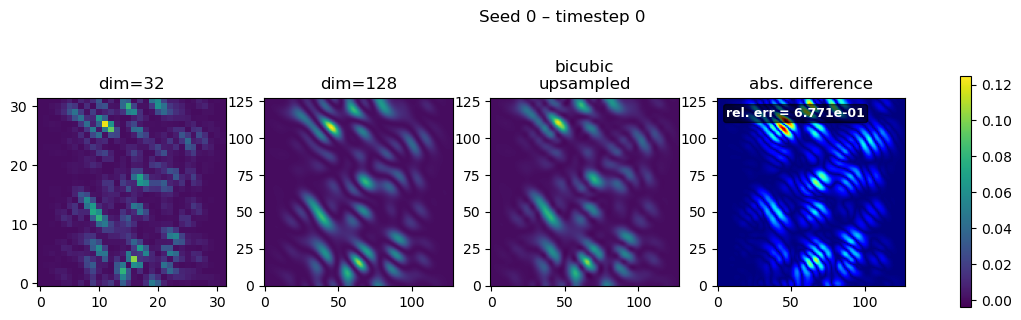

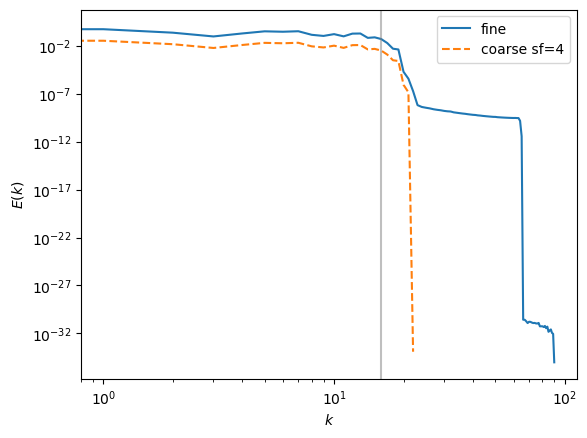

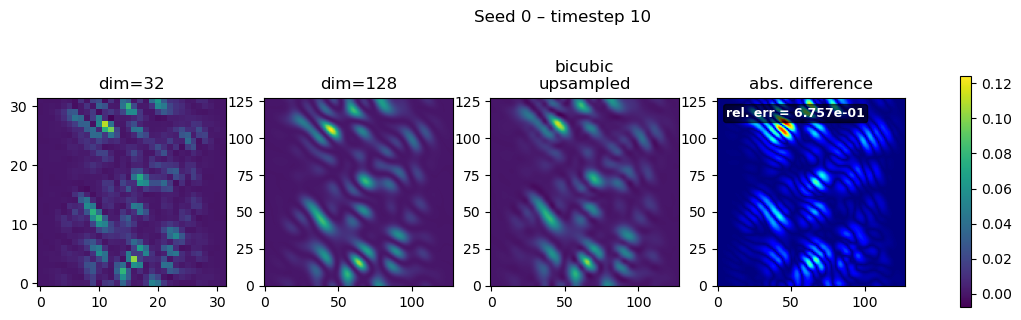

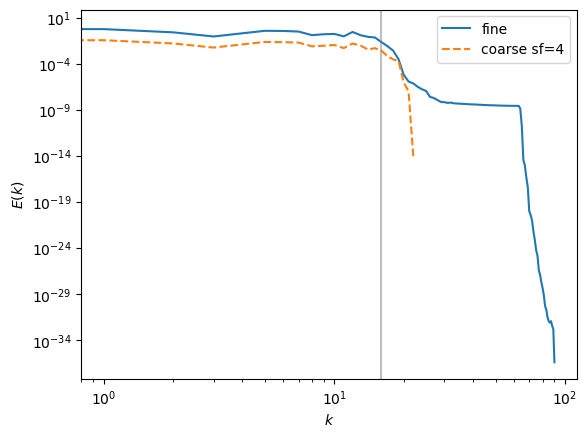

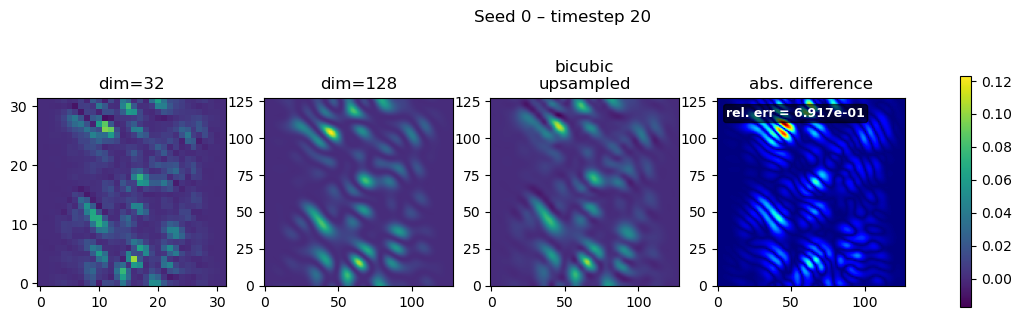

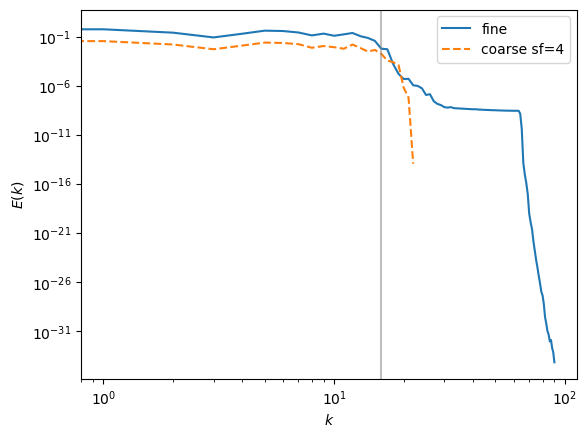

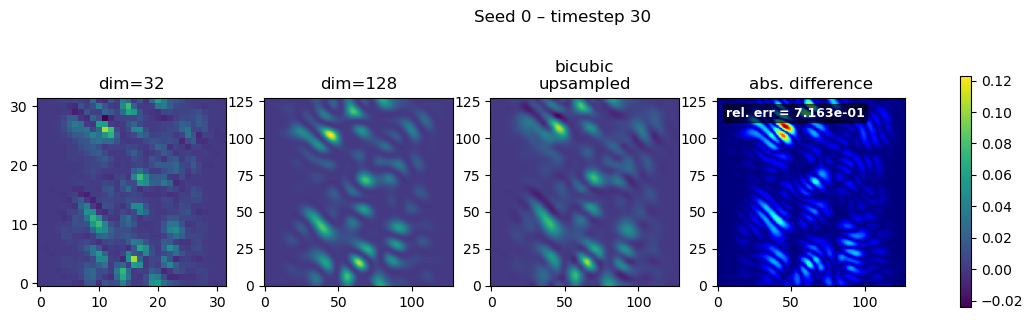

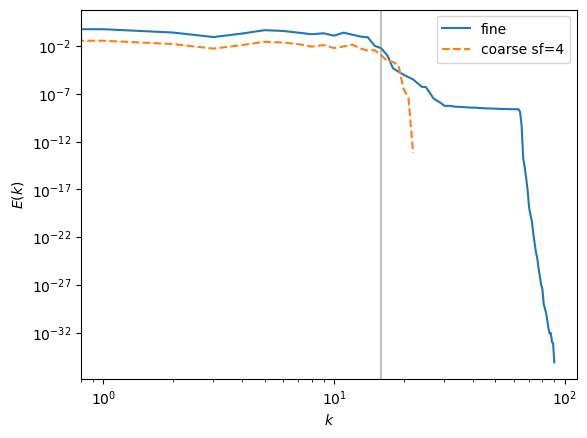

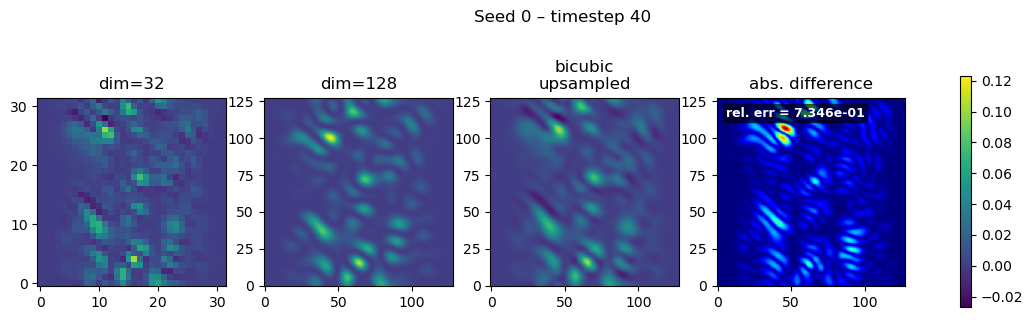

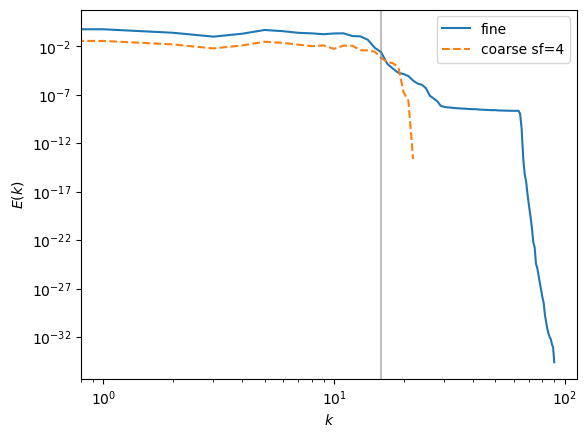

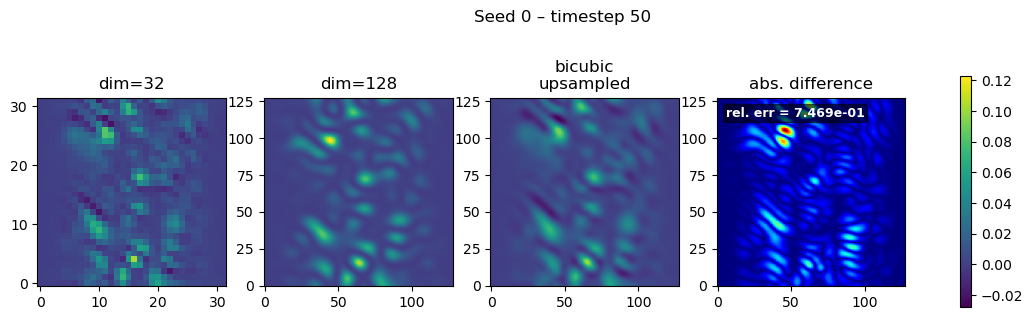

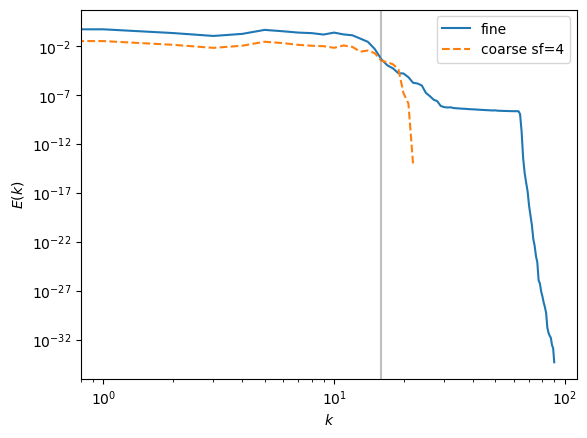

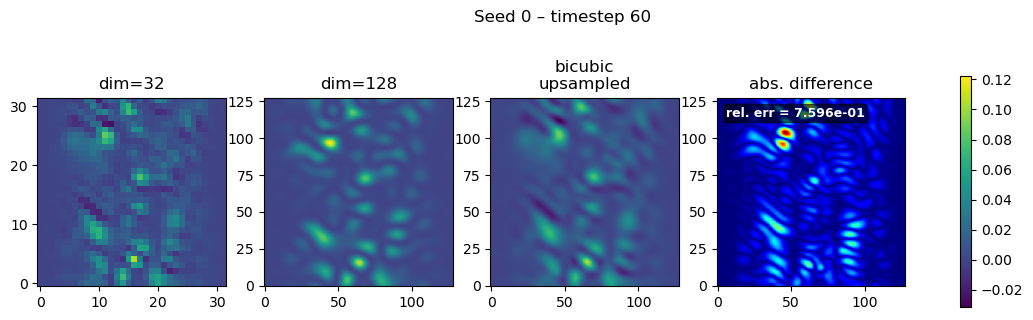

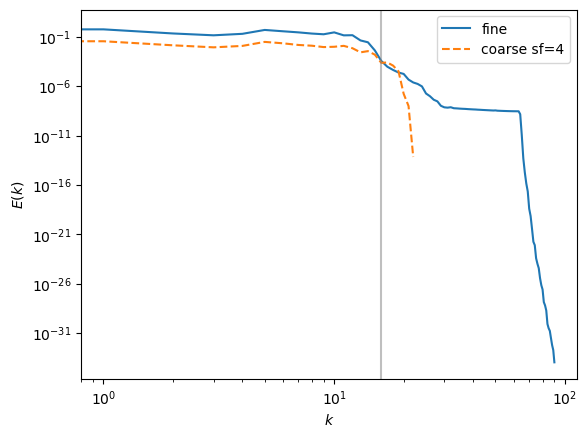

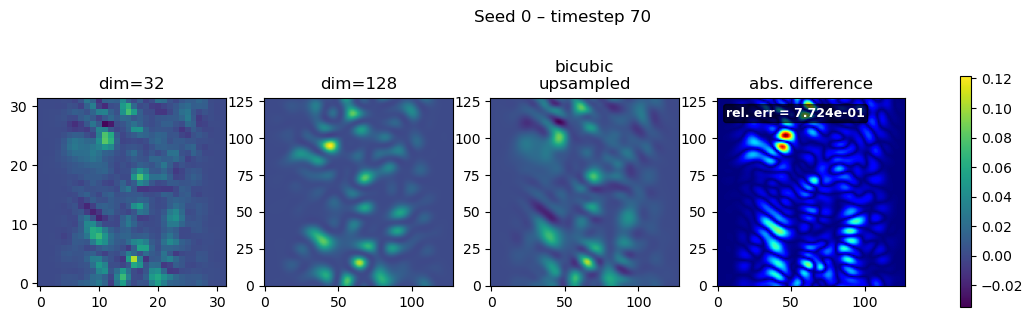

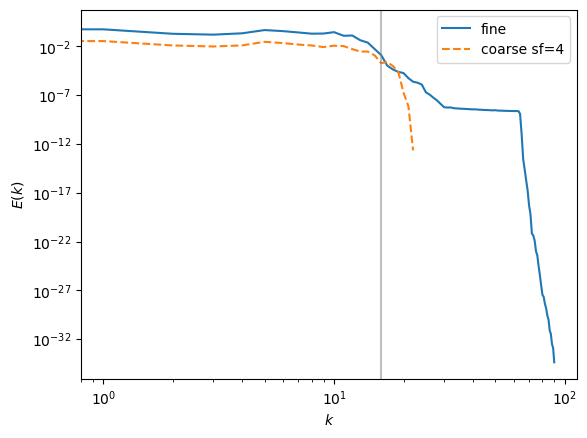

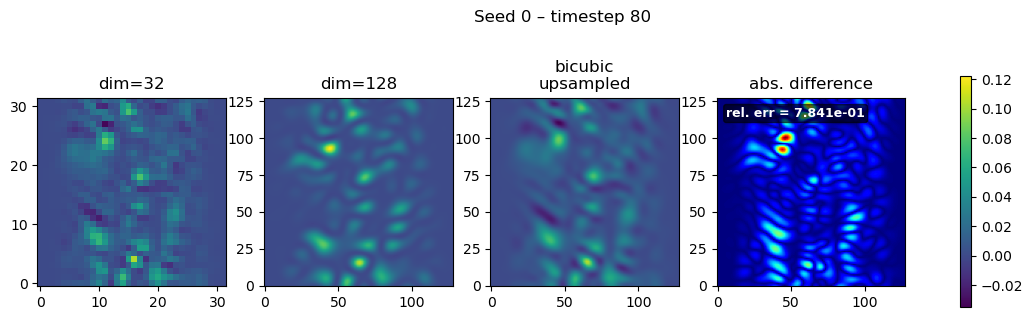

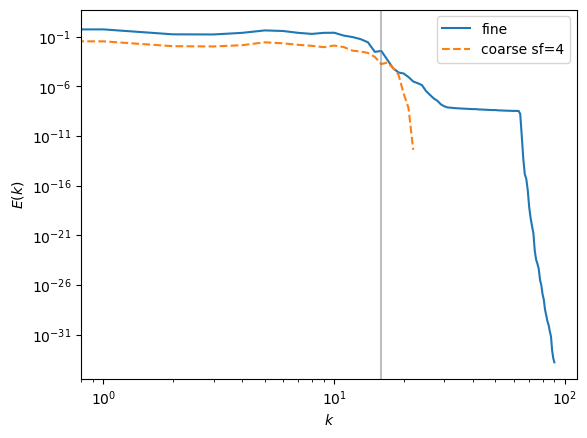

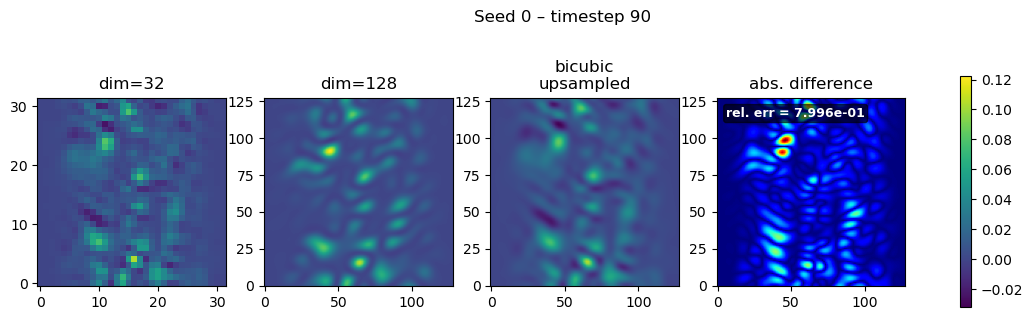

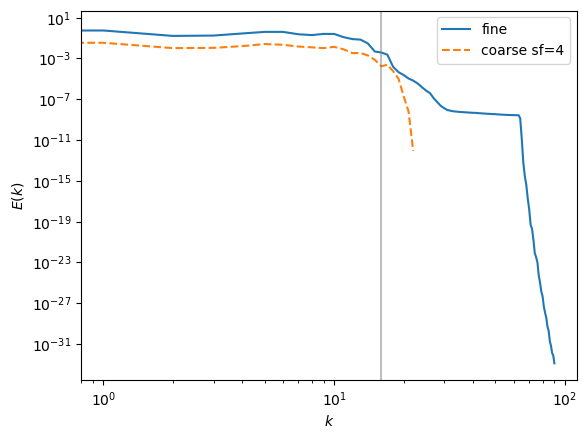

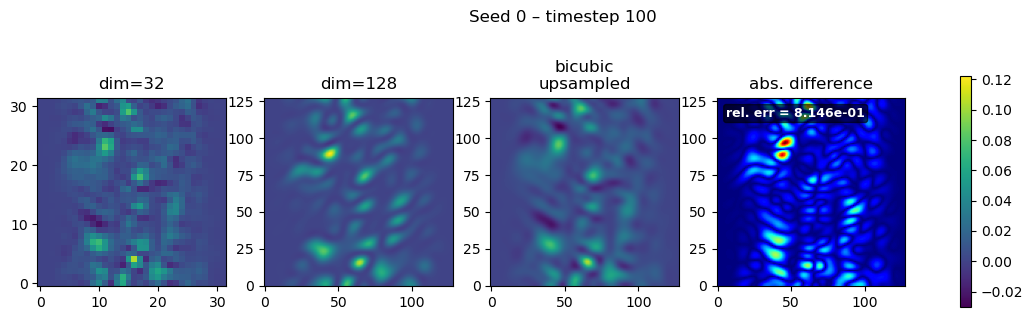

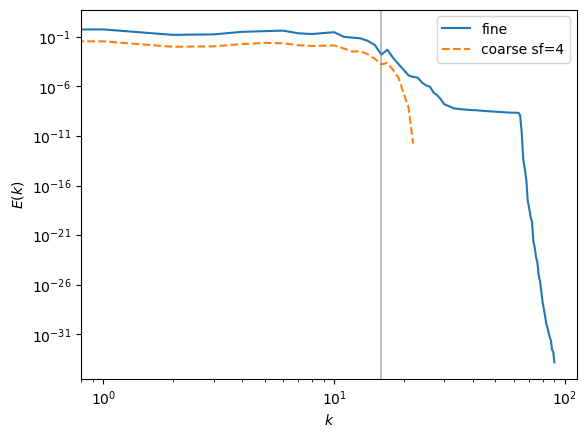

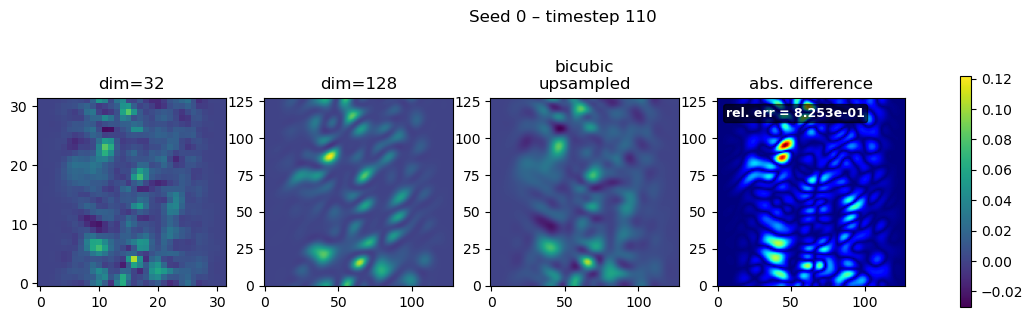

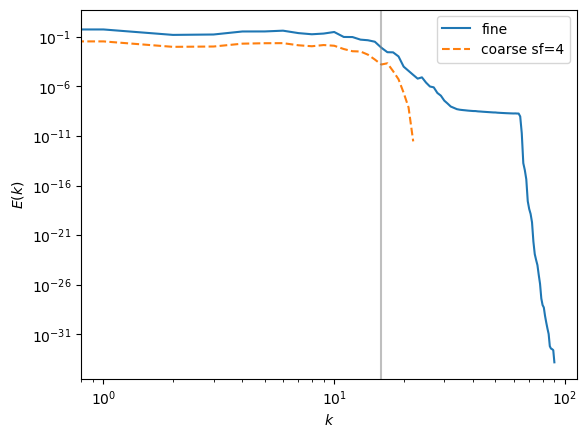

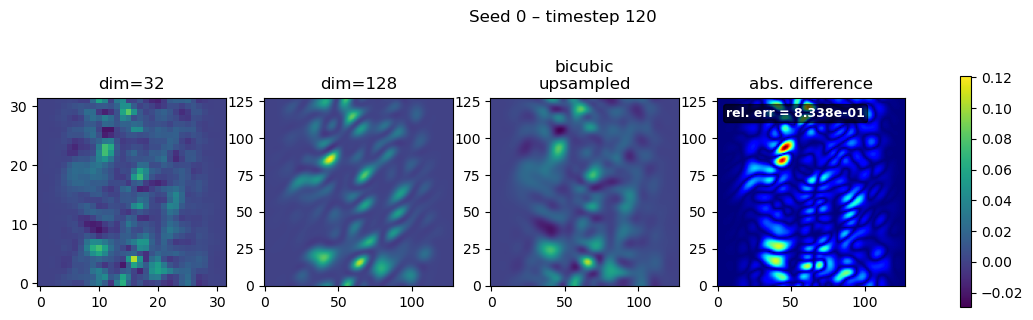

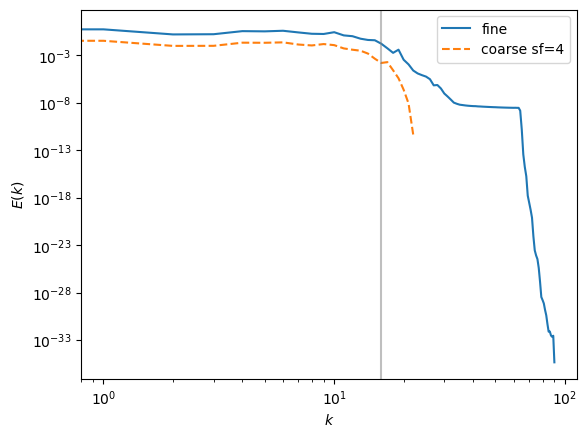

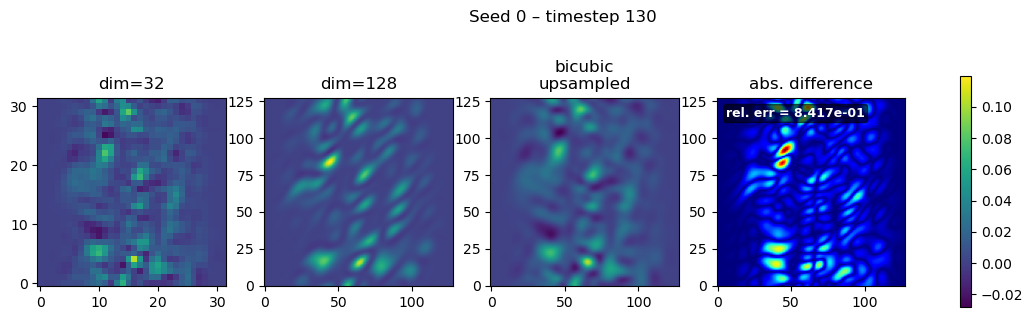

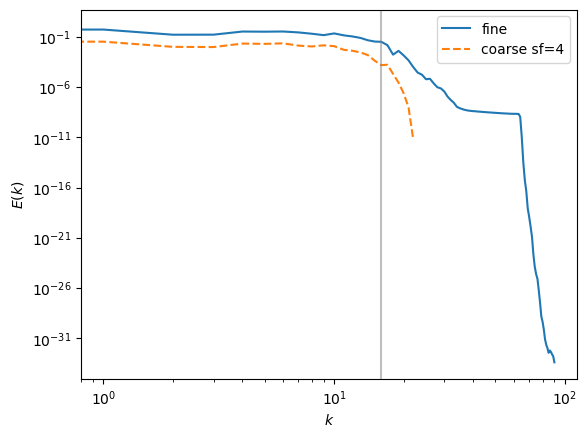

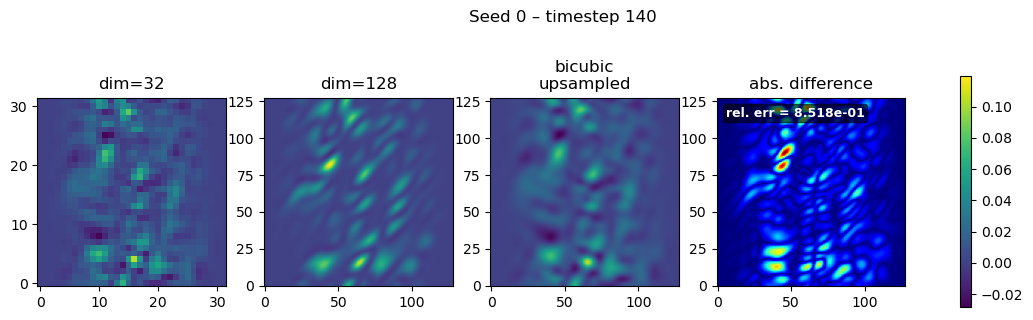

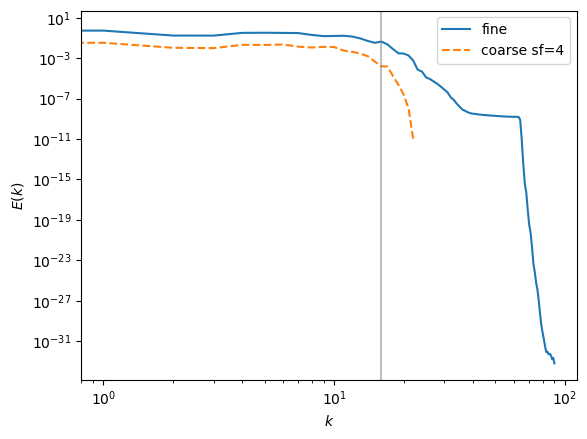

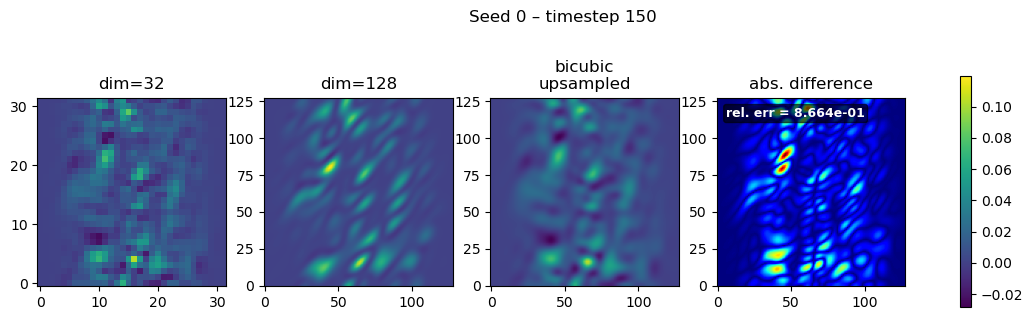

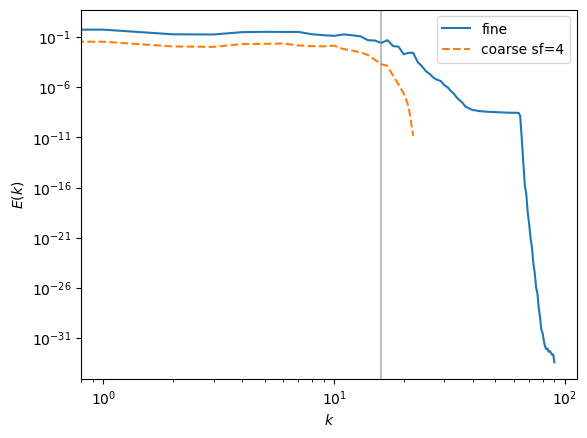

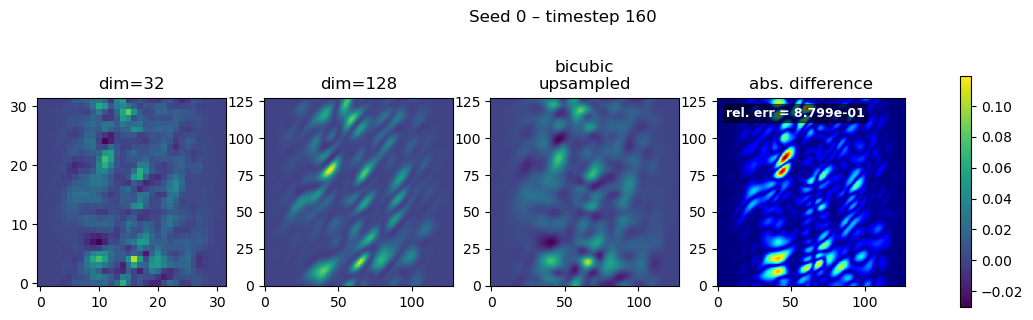

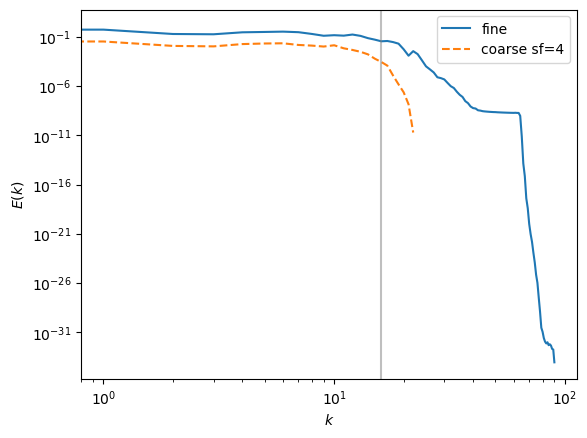

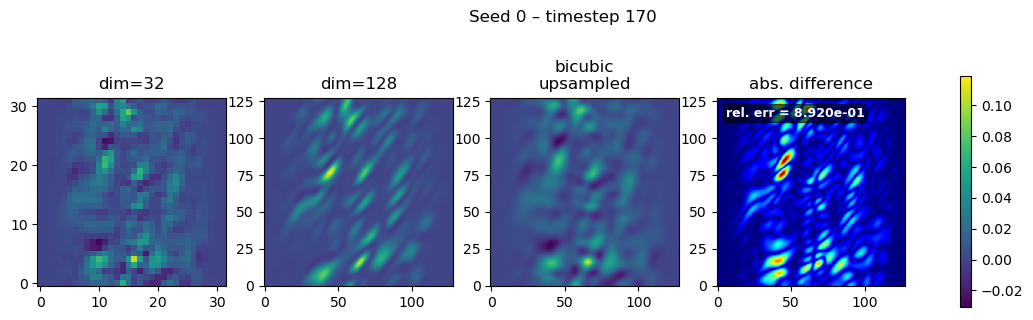

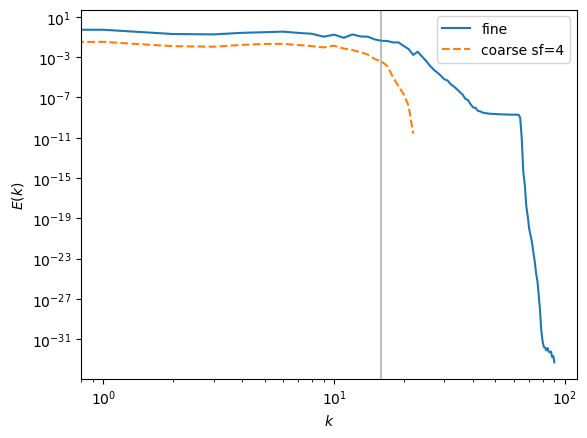

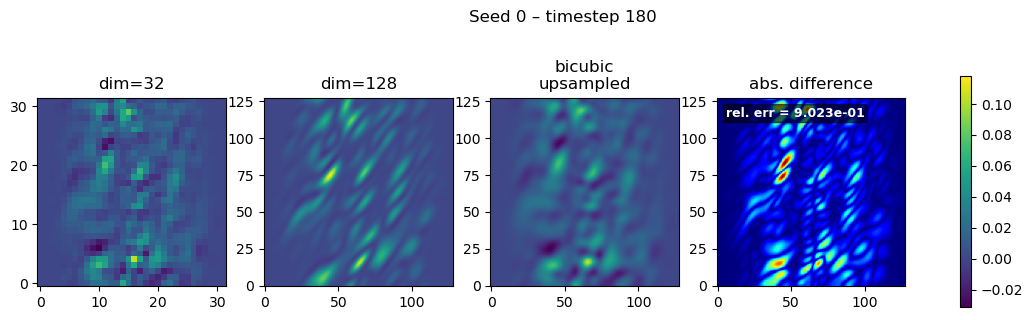

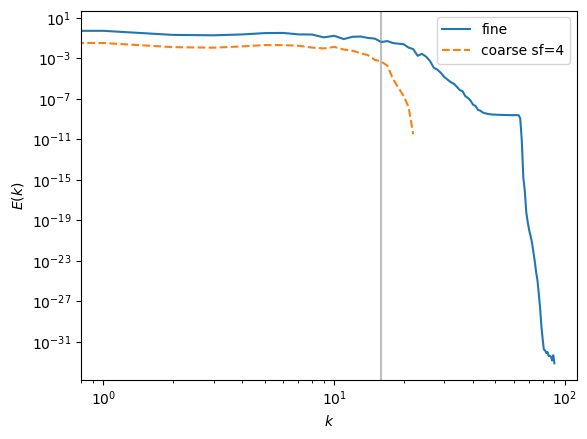

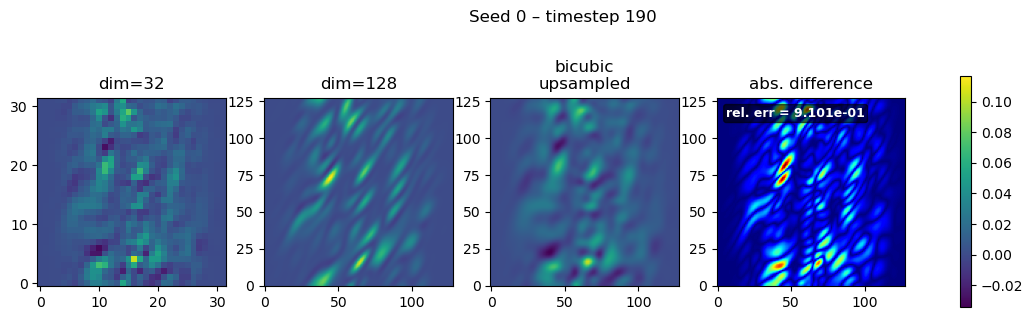

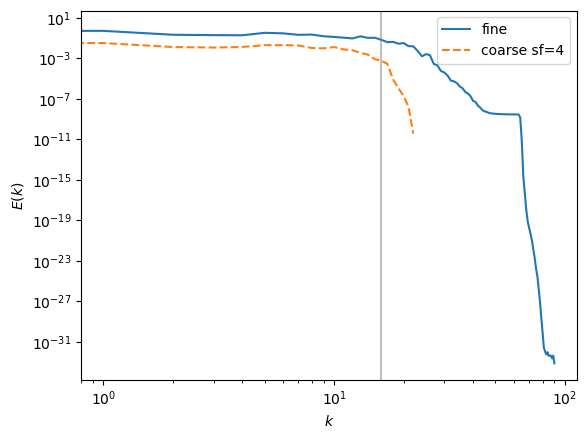

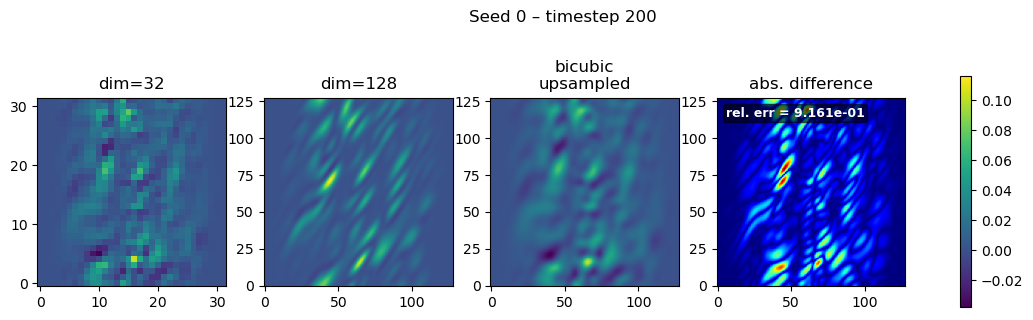

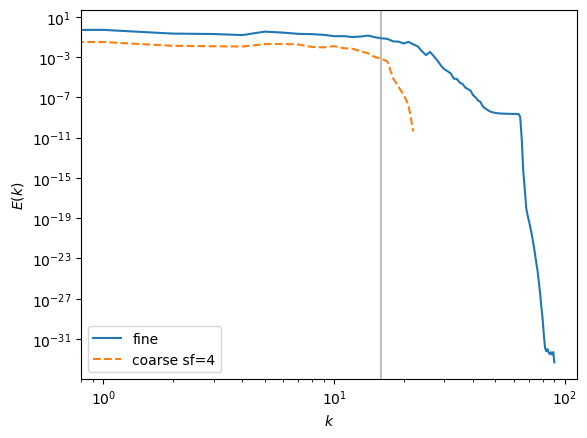

In [7]:
# ------------------------------------------------------------------
# user‑controlled parameters
dims        = [5, 7]          # the two “Ls” you want to compare
n_seeds     = 1               # change if you have more than seed‑0
mx, my      = 8, 8            # constants used in the folder name
base_dir    = f"/pscratch/sd/h/hbassi/data250506/VP1-random-fd-no-ion"#"/global/cfs/projectdirs/m1027/erikaye/vlasov_random/data250411/VP1-random-fd"
# ------------------------------------------------------------------

for seed in [0]:

    # ----- load both snapshots for this seed --------------------------------
    data_dict = {}
    for dim in dims:
        # path = (f"{base_dir}/mx{mx}my{my}/"
        #         f"fe_seed{seed}_k0.1_mr25.0_"
        #         f"Ls{dim:02d},{dim:02d},{dim:02d}_o1_cfl0.9_T1.0_te344.pkl")
        path = (f"{base_dir}/mx{mx}my{my}/"
                f"fe_seed{seed}_k0.1_mr25.0_"
                f"Ls{dim:02d},{dim:02d},{dim:02d}_o1_dt0.005_T1.0_te344.pkl")
        with open(path, "rb") as f:
            data = pickle.load(f)
        data_dict[dim] = data[-1]          # shape: (T, Ny, Nx)

    # consistency check (optional)
    n_steps = data_dict[dims[0]].shape[0]

# ----- draw one figure per time step ------------------------------------
    for t in range(0, n_steps, 10):
        
        # ------------------------------------------------------------------
        # pull out the low‑ and high‑resolution slices for this time step
        low_dim, high_dim = sorted(dims)          # 7 → low, 8 → high
        low  = data_dict[low_dim ][t].real
        high = data_dict[high_dim][t].real

        # bicubic upsample (order=3) from low grid to high grid
        zoom_factor = high.shape[0] / low.shape[0]
        upsampled   = zoom(low, zoom=zoom_factor, order=3)

        # absolute difference field
        diff = np.abs(upsampled - high)
         
        rel_err = diff.mean() / np.abs(high).mean()
        rel_text = f"rel. err = {rel_err:0.3e}"

        # ------------------------------------------------------------------
        # colour limits: keep the first three panels comparable
        vmin = min(low.min(), high.min(), upsampled.min())
        vmax = max(low.max(), high.max(), upsampled.max())

        fig, axes = plt.subplots(1, 4, figsize=(14, 4), sharex=False, sharey=False)

        # panel 0 – original low‑res
        im0 = axes[0].imshow(low, vmin=vmin, vmax=vmax, origin="lower")
        axes[0].set_title(f"dim={2**low_dim}")

        # panel 1 – original high‑res
      
        axes[1].imshow(high, vmin=vmin, vmax=vmax, origin="lower")
        axes[1].set_title(f"dim={2**high_dim}")

        # panel 2 – bicubic upsampled
        axes[2].imshow(upsampled, vmin=vmin, vmax=vmax, origin="lower")
        axes[2].set_title("bicubic\nupsampled")

        # panel 3 – |upsampled – high|
        im3 = axes[3].imshow(diff, origin="lower",cmap='jet')
        axes[3].set_title("abs. difference")
        axes[3].text(
            0.05, 0.95, rel_text,
            transform=axes[3].transAxes,
            fontsize=9, fontweight="bold",
            va="top", ha="left",
            color="white",
            bbox=dict(boxstyle="round,pad=0.2", facecolor="black", alpha=0.6)
        )

        # colour‑bars
        fig.colorbar(im0, ax=axes, shrink=0.75)   # shared for panels 0‑2
        #fig.colorbar(im3, ax=axes[0],  shrink=0.75)   # separate for diff

        fig.suptitle(f"Seed {seed} – timestep {t}", y=0.95)
        #plt.tight_layout()
        plt.show()
        plt.close()
        k_fine, E_fine = radial_energy_spectrum(high)
        plt.loglog(k_fine, E_fine, label='fine')
  
        
        k_coarse, E_coarse = radial_energy_spectrum(low)
        plt.loglog(k_coarse, E_coarse, '--', label=f'coarse sf={4}')
        k_nyq = (low.shape[-1]//2)  # integer Nyquist index
        
        plt.axvline(k_nyq, color='grey', alpha=0.5)
        
        plt.xlabel(r'$k$'); plt.ylabel(r'$E(k)$'); plt.legend(); plt.show()

In [7]:
# # -------------- user parameters -----------------
# dims     = [5, 7]        # low‑ and high‑bond tags
# mx, my   = 4, 8
# n_seeds  = 100
# qe       = -1  # electron charge (C)
# # ------------------------------------------------

# for seed in range(0, n_seeds, 10):

#     fe, dv = {}, {}          # distribution and Δv for each dim

#     # ---------- load the two electron distributions ----------
#     for dim in dims:
#         path = (f"{base_dir}/mx{mx}my{my}/"
#                 f"fe_seed{seed}_k0.1_mr25.0_"
#                 f"Ls{dim:02d},{dim:02d},{dim:02d}_o1_cfl0.9_T1.0_te4.pkl")
#         with open(path, "rb") as f:
#             data = pickle.load(f)

#         fe[dim] = data[-1].real               # shape (Nt, Nx, Nv)

#         # ---- Δv from the velocity grid stored in data[2] ----
#         v_axis  = np.asarray(data[2])
#         if v_axis.ndim != 1:
#             raise ValueError("velocity grid expected as 1‑D array")
#         dv[dim] = np.diff(v_axis).mean()

#     Nt            = fe[dims[0]].shape[0]
#     low_dim       = min(dims);   high_dim = max(dims)
#     Nx_low, Nv_l  = fe[low_dim ].shape[1:]
#     Nx_high, Nv_h = fe[high_dim].shape[1:]
#     scale_x       = Nx_high / Nx_low        # factor 2 if 128→256

#     # ------------- ρ(x,t) = q Σ f Δv for each run -------------
#     rho = {d: qe * fe[d].sum(axis=-1) * dv[d] for d in dims}
#     # rho[d] has shape (Nt, Nx_d)

#     # ------------------- plot every frame ---------------------
#     for t in range(Nt):

#         rho_low  = rho[low_dim][t]
#         rho_high = rho[high_dim][t]

#         # up‑sample low‑res charge density onto high grid
#         rho_up = zoom(rho_low, zoom=scale_x, order=3)

#         # x‑coordinates for a simple line plot
#         x_low  = np.arange(Nx_low)
#         x_high = np.linspace(0, Nx_low-1, Nx_high)

#         fig, ax = plt.subplots(figsize=(7, 4))
#         ax.plot(x_low,  rho_low,  'o-', label=f"ρ dim={2**low_dim}  (Δv={dv[low_dim]:.3g})")
#         ax.plot(x_high, rho_high, '-',  label=f"ρ dim={2**high_dim} (Δv={dv[high_dim]:.3g})")
#         ax.plot(x_high, rho_up,  '--', label="ρ up‑sampled")

#         # global relative L² error between up‑sampled and high‑res
#         l2_rel = np.linalg.norm(rho_up - rho_high) / np.linalg.norm(rho_high)
#         ax.set_title(f"Seed {seed} – time step {t}   (rel L² = {l2_rel:.2e})")
#         ax.set_xlabel(r"$x$")
#         ax.set_ylabel(r"charge density ρ  (C m$^{-3}$)")
#         ax.legend()
#         plt.tight_layout()
#         plt.show()

In [4]:
def radial_energy_spectrum(u):
    """
    Return one-sided radial spectrum normalized so that
    sum_k E(k) == sum_x,y |u|^2  (Parseval).
    """
    N = u.shape[0]
    u_hat = np.fft.fftshift(np.fft.fft2(u))
    energy_density = np.abs(u_hat)**2 / N ** 2
    kx = np.fft.fftshift(np.fft.fftfreq(N))*N
    KX, KY = np.meshgrid(kx, kx, indexing='ij')
    kr     = np.sqrt(KX**2 + KY**2).astype(int)
    E      = np.bincount(kr.ravel(), energy_density.ravel(),
                         minlength=kr.max()+1)
    return np.arange(kr.max()+1), E


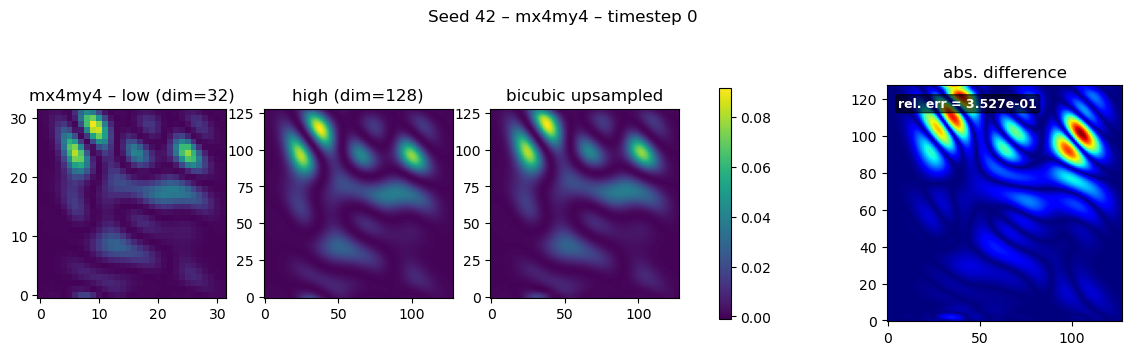

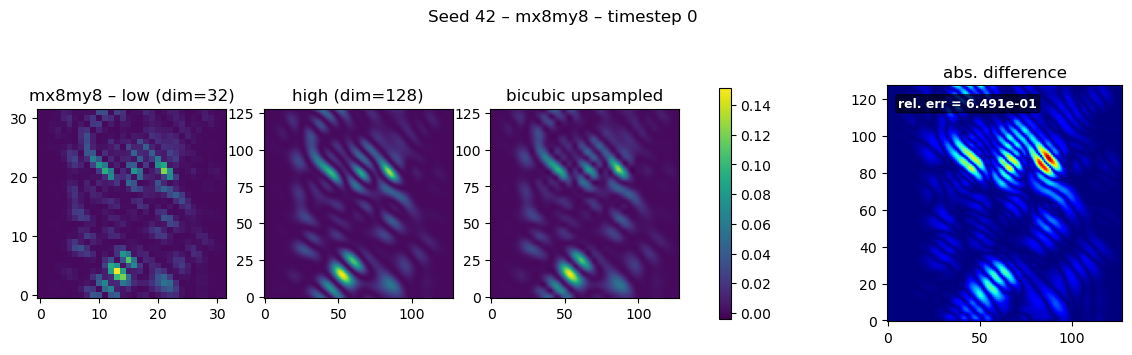

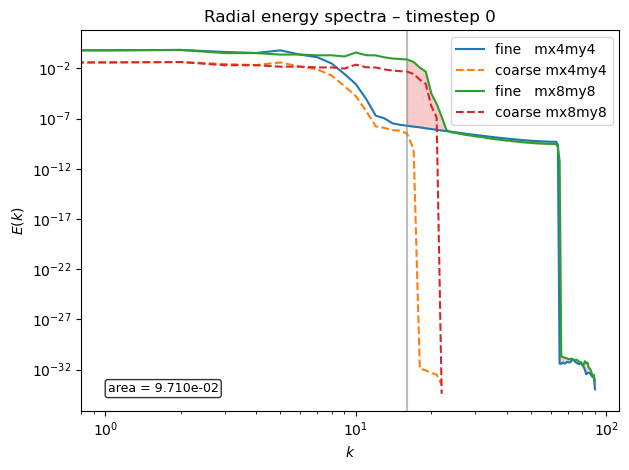

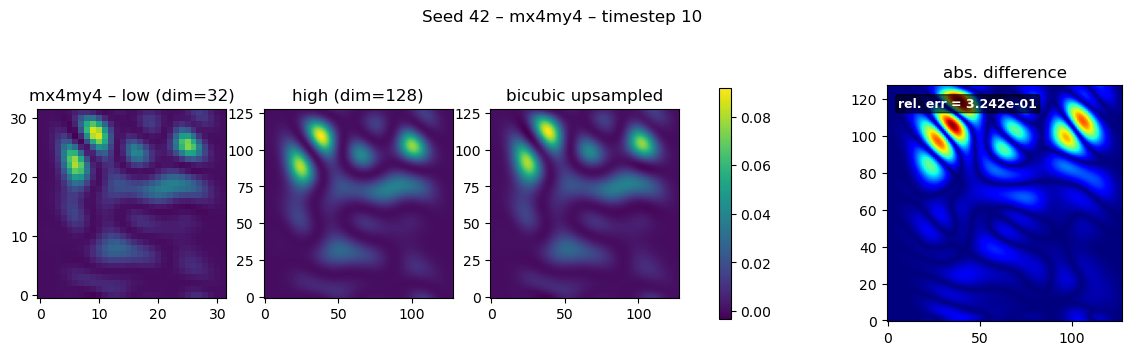

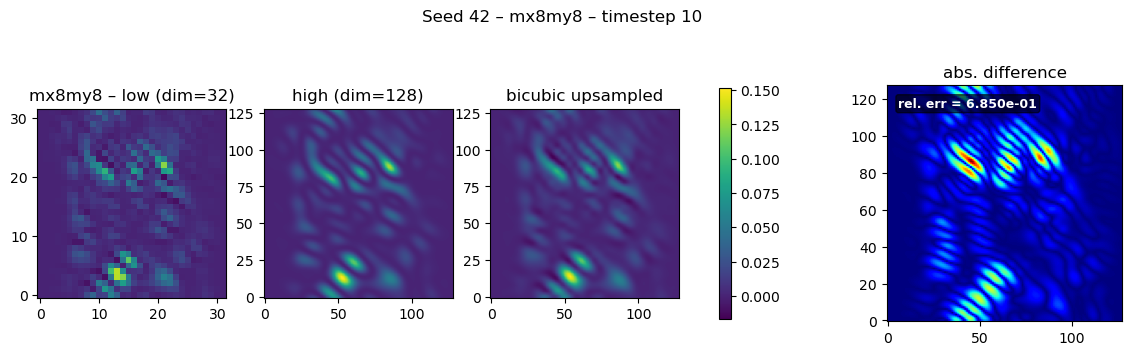

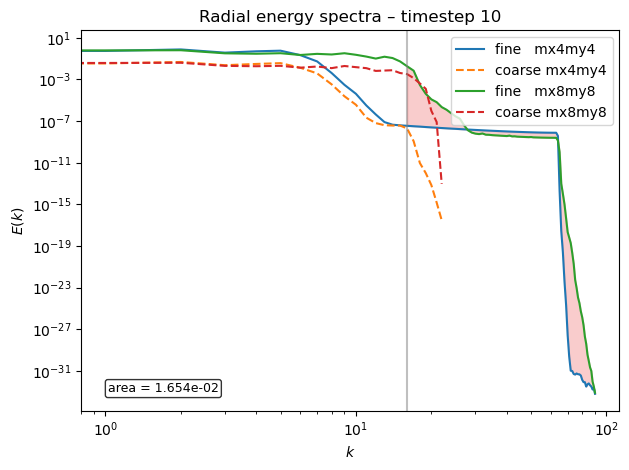

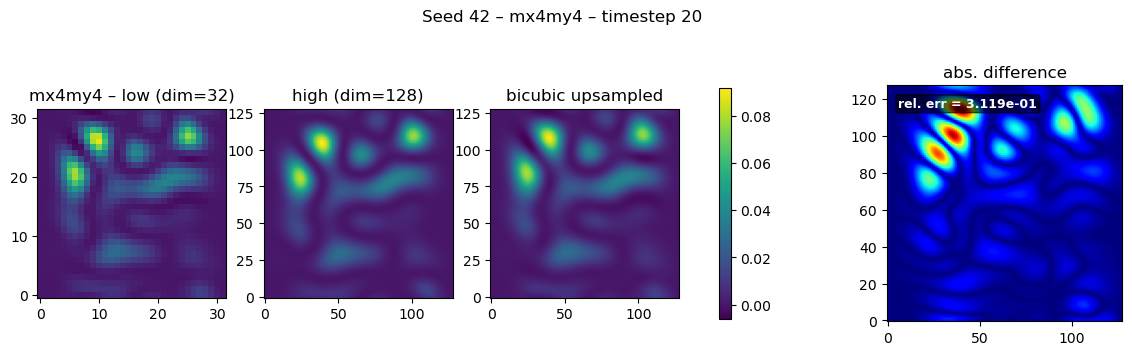

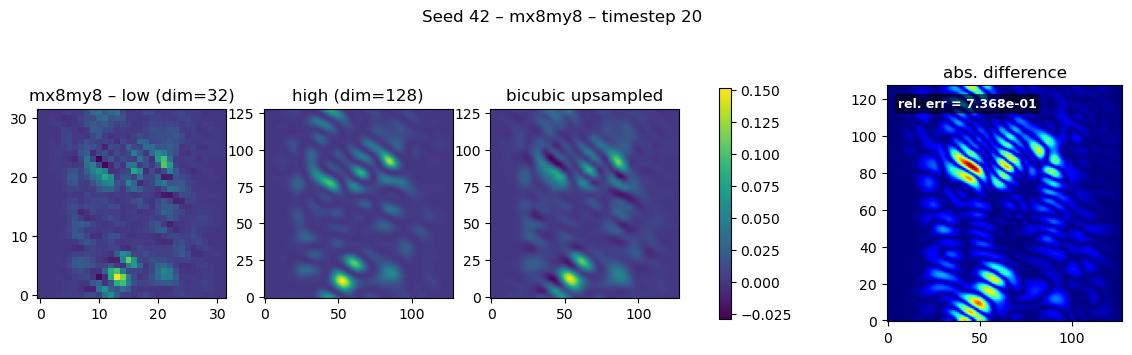

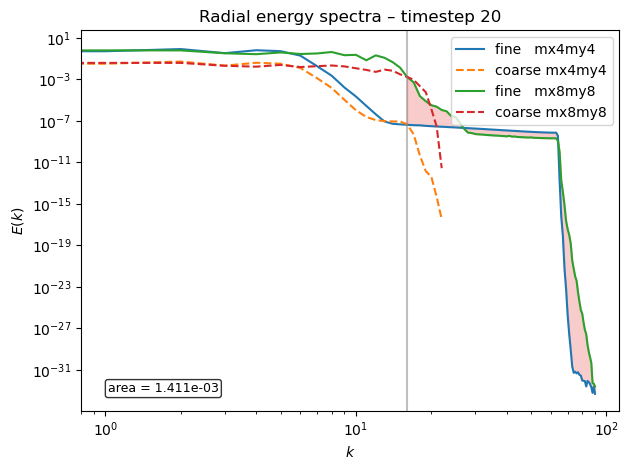

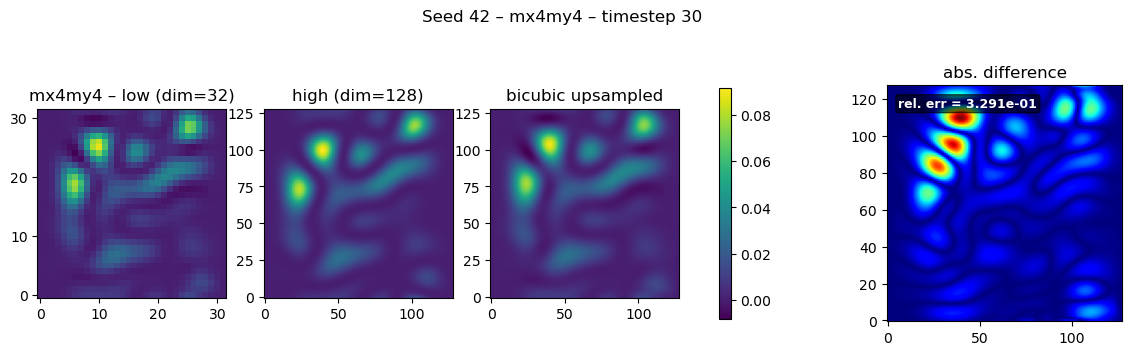

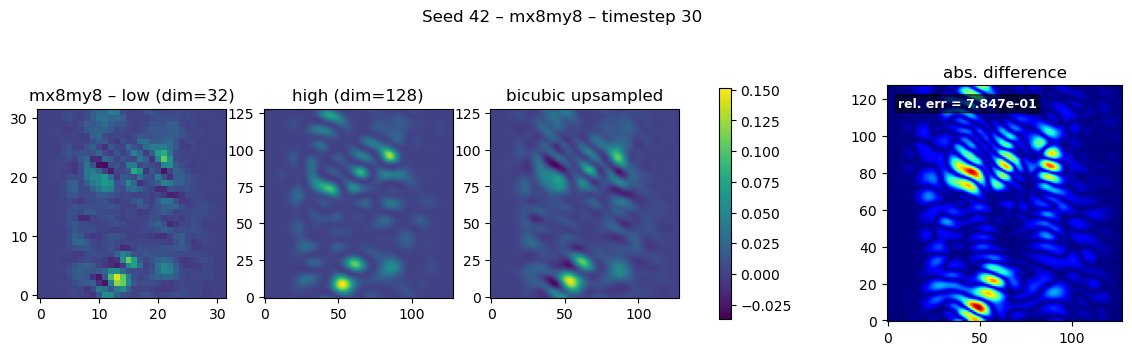

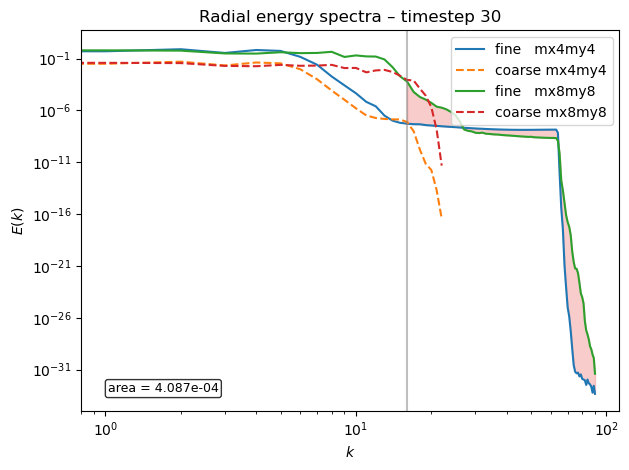

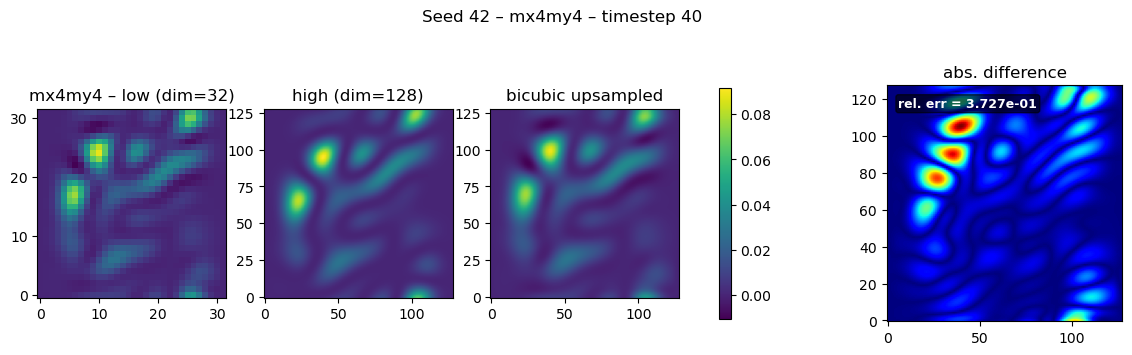

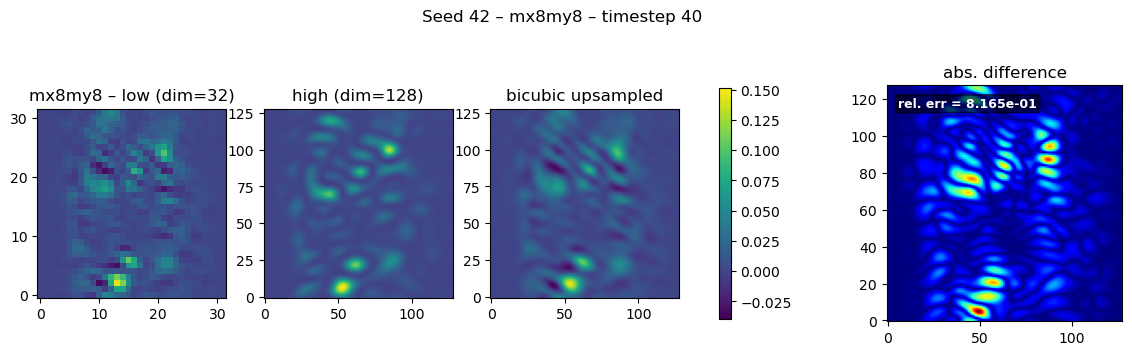

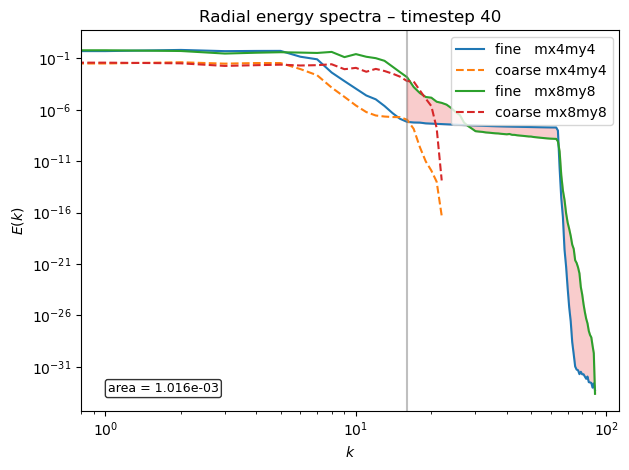

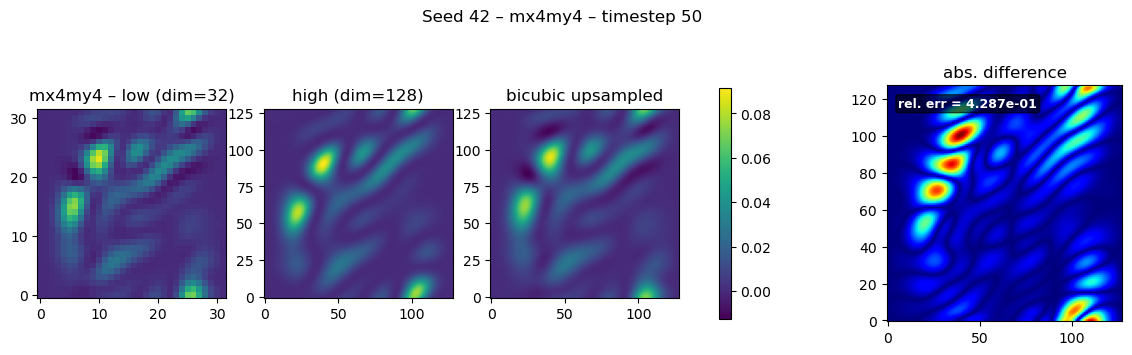

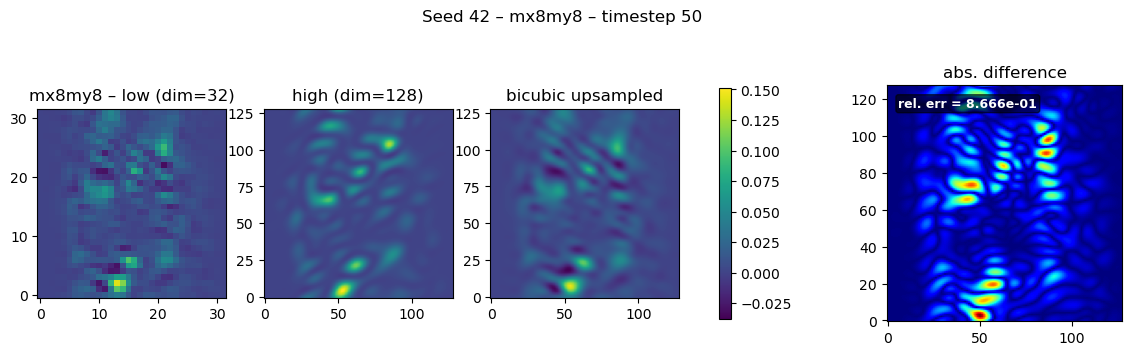

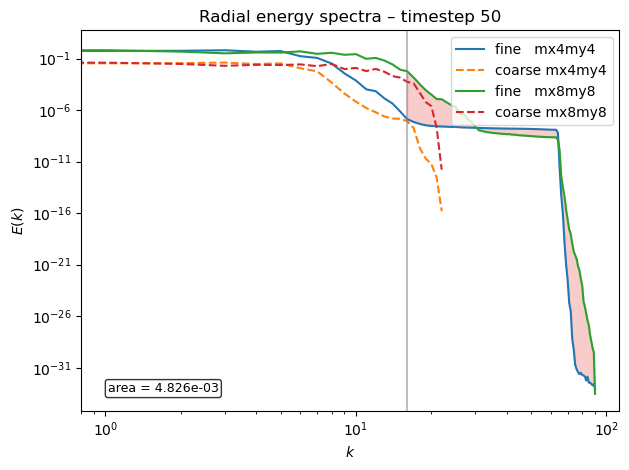

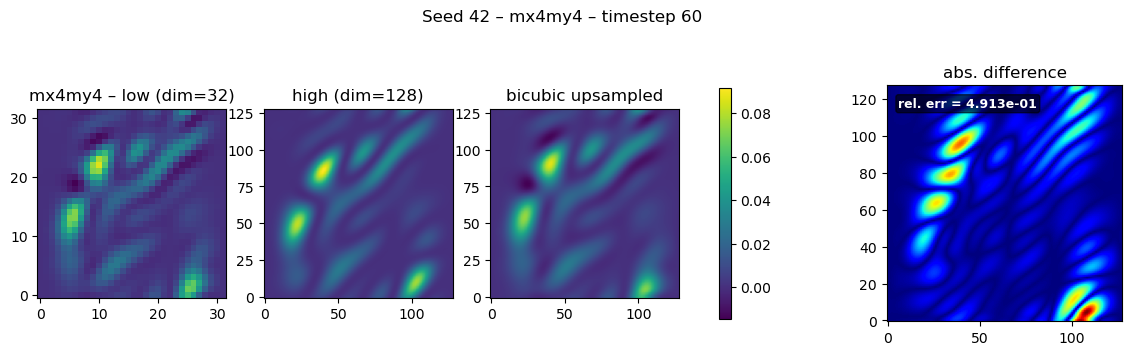

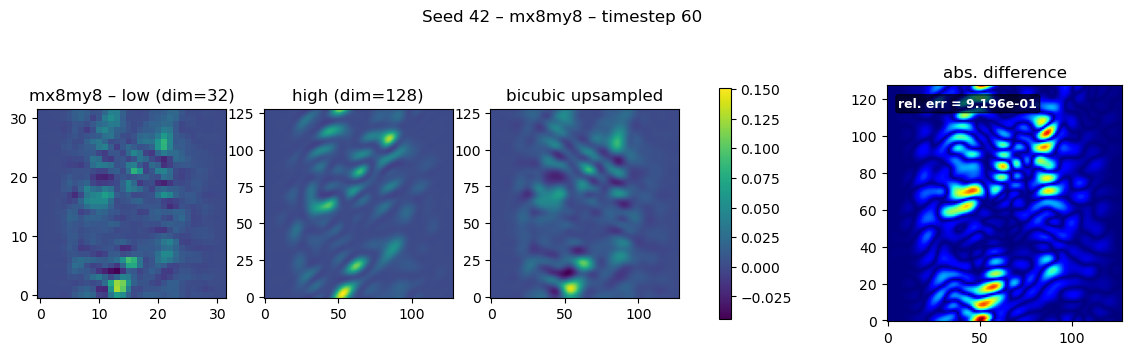

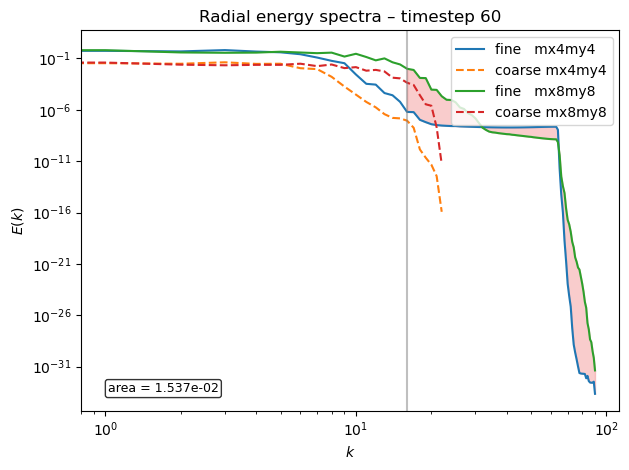

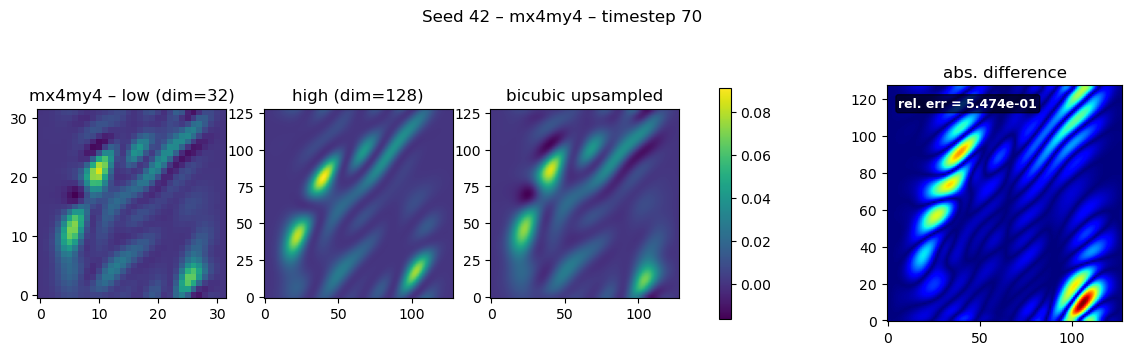

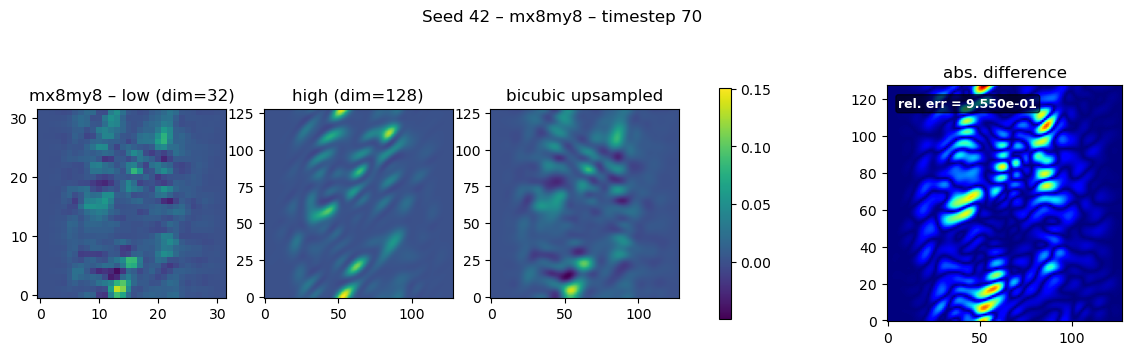

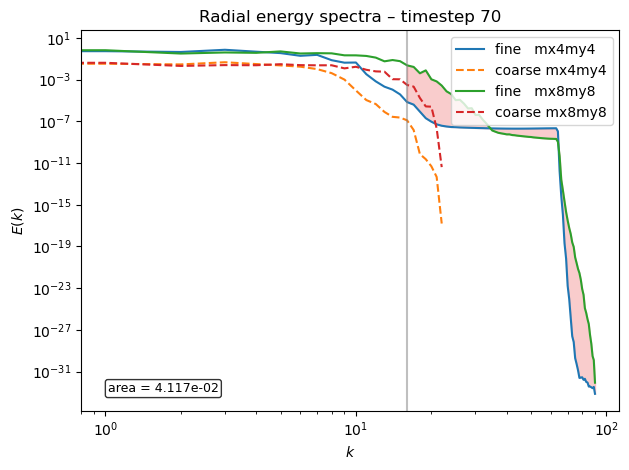

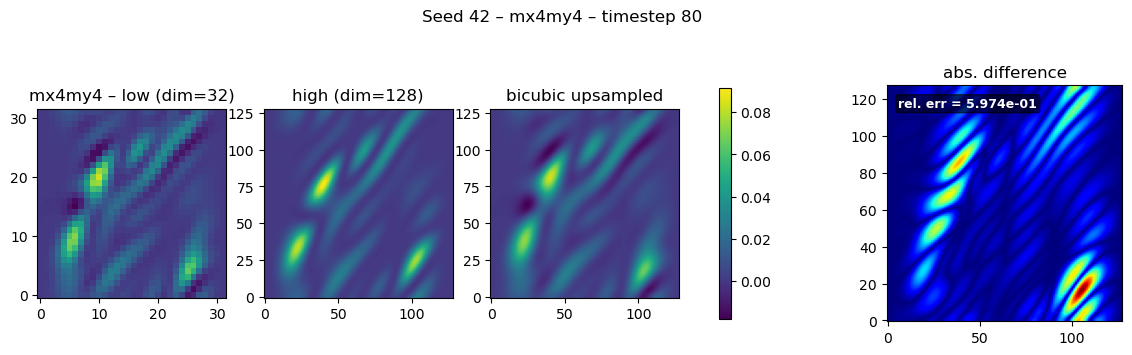

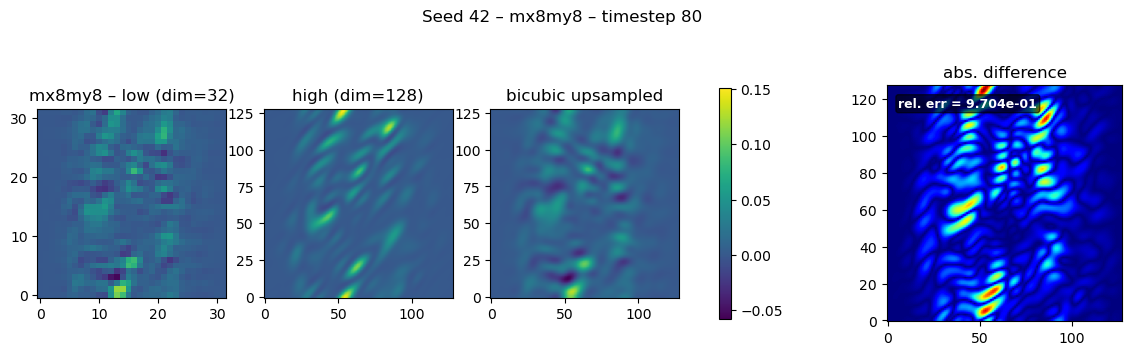

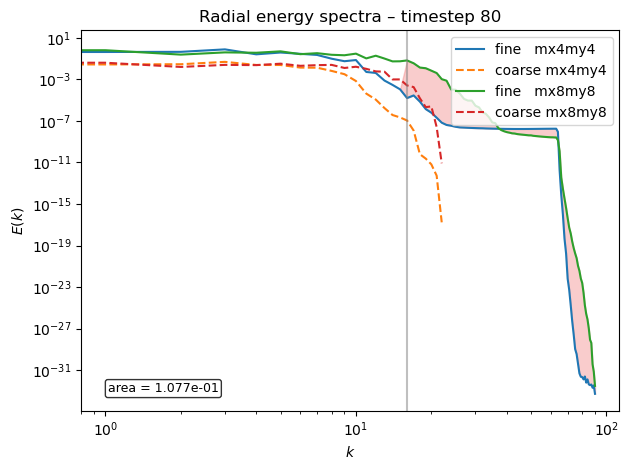

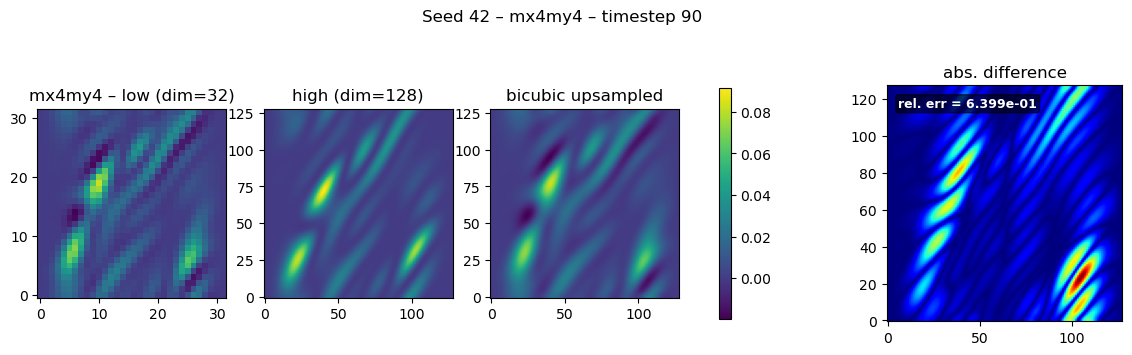

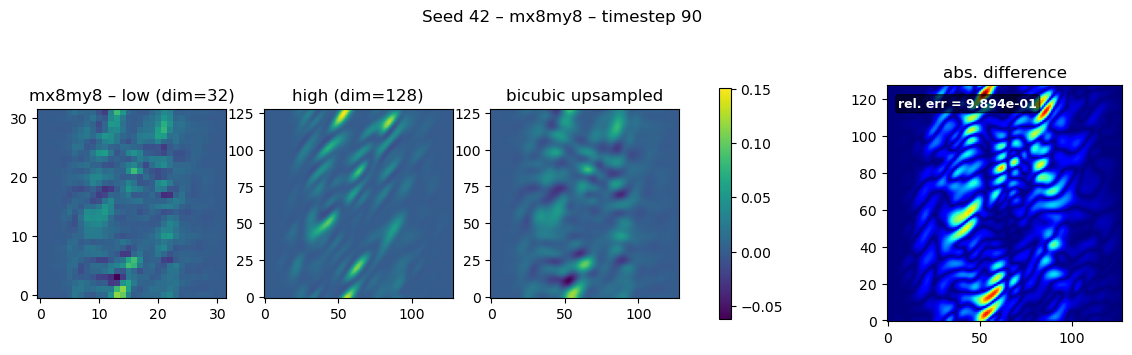

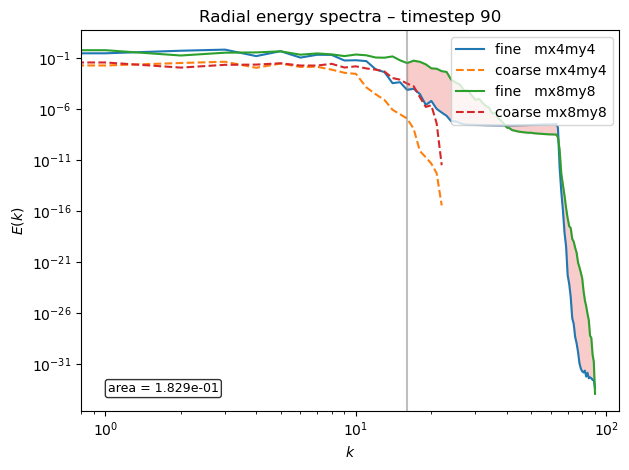

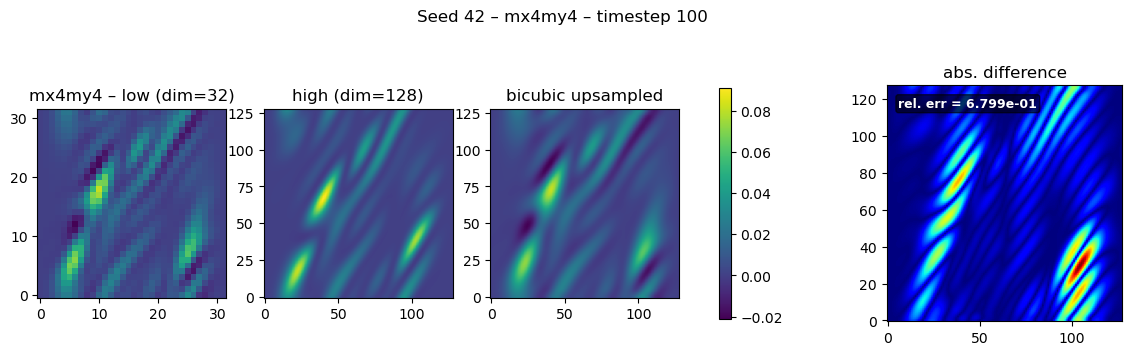

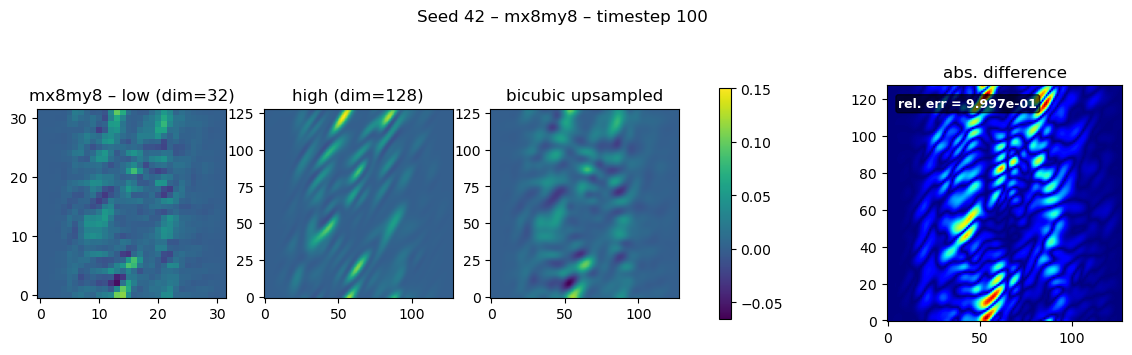

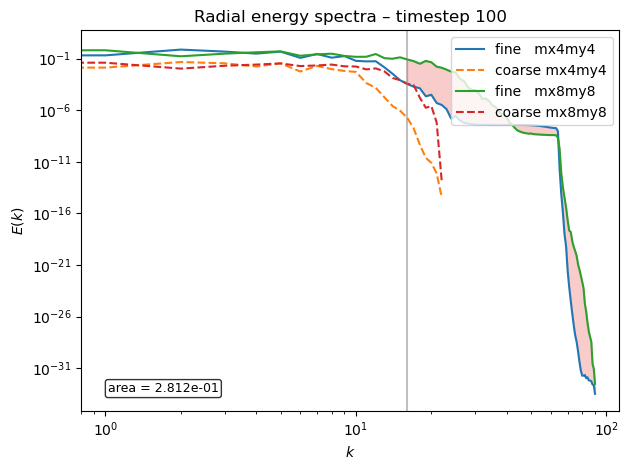

In [30]:
# ------------------------------------------------------------------
# user-controlled parameters
dims        = [5, 7]    # the two grid exponents → 2**5=32, 2**7=128
seed        = 42       # fixed initial condition
base_dir    = "/pscratch/sd/h/hbassi/data250506/VP1-random-fd_test_fixed_timestep"
mx_my_list  = [(4, 4), (8, 8)]
# ------------------------------------------------------------------

# 1) load data for both mx,my settings
data_all = {}
for mx, my in mx_my_list:
    data_dict = {}
    for dim in dims:
        path = (
            f"{base_dir}/mx{mx}my{my}/"
            f"fe_seed{seed}_k0.1_mr25.0_"
            f"Ls{dim:02d},{dim:02d},{dim:02d}_o1_dt0.010_T1.0_te4.pkl"
        )
        with open(path, "rb") as f:
            data = pickle.load(f)
        # assume data[-1] has shape (T, Ny, Nx)
        data_dict[dim] = data[-1].real
    data_all[(mx, my)] = data_dict

# determine number of steps
first_dict = data_all[mx_my_list[0]]
n_steps    = first_dict[dims[0]].shape[0]

# 2) loop over time
for t in range(0, n_steps, 10):

    # ——— two separate flow‐match figures ———
    for mx, my in mx_my_list:
        data_dict = data_all[(mx, my)]
        low_dim, high_dim = sorted(dims)
        low  = data_dict[low_dim][t]
        high = data_dict[high_dim][t]

        # bicubic upsample low→high
        zoom_factor = high.shape[0] / low.shape[0]
        upsampled   = zoom(low, zoom=zoom_factor, order=3)

        # difference + relative error
        diff     = np.abs(upsampled - high)
        rel_err  = diff.mean() / np.abs(high).mean()
        rel_txt  = f"rel. err = {rel_err:0.3e}"

        # shared color range
        vmin = min(low.min(), high.min(), upsampled.min())
        vmax = max(low.max(), high.max(), upsampled.max())

        fig, axes = plt.subplots(1, 4, figsize=(14, 4))
        im0 = axes[0].imshow(low,  vmin=vmin, vmax=vmax, origin='lower')
        axes[0].set_title(f"mx{mx}my{my} – low (dim={2**low_dim})")
        im1 = axes[1].imshow(high, vmin=vmin, vmax=vmax, origin='lower')
        axes[1].set_title(f"high (dim={2**high_dim})")
        im2 = axes[2].imshow(upsampled, vmin=vmin, vmax=vmax, origin='lower')
        axes[2].set_title("bicubic upsampled")
        im3 = axes[3].imshow(diff, origin='lower', cmap='jet')
        axes[3].set_title("abs. difference")
        axes[3].text(
            0.05, 0.95, rel_txt,
            transform=axes[3].transAxes,
            fontsize=9, fontweight="bold",
            va="top", ha="left",
            color="white",
            bbox=dict(boxstyle="round,pad=0.2", facecolor="black", alpha=0.6)
        )
        fig.colorbar(im0, ax=axes[:3], shrink=0.75)
        fig.suptitle(f"Seed {seed} – mx{mx}my{my} – timestep {t}", y=0.98)
        #plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()
        plt.close(fig)

    # ——— combined spectra + shaded ΔE_fine ———
    fig, ax = plt.subplots()
    high_dim = max(dims)            # exponent for fine grid
    low_dim  = min(dims)            # exponent for coarse grid

    kf_list, Ef_list = [], []
    kc_list, Ec_list = [], []

    # plot all curves
    for mx, my in mx_my_list:
        fine = data_all[(mx, my)][high_dim][t]
        coarse = data_all[(mx, my)][low_dim][t]

        kf, Ef = radial_energy_spectrum(fine)
        kc, Ec = radial_energy_spectrum(coarse)

        kf_list.append(kf)
        Ef_list.append(Ef)
        kc_list.append(kc)
        Ec_list.append(Ec)

        ax.loglog(kf, Ef,     label=f"fine   mx{mx}my{my}")
        ax.loglog(kc, Ec, "--", label=f"coarse mx{mx}my{my}")

    # Nyquist frequency of the coarse grid
    k_nyq = 2**low_dim // 2
    ax.axvline(k_nyq, color="grey", alpha=0.5)

    # assume kf_list[0] == kf_list[1]; mask out k > k_nyq
    kf_base = kf_list[0]
    mask    = kf_base >= k_nyq

    # compute ΔE_fine past Nyquist
    area = np.trapz(
        np.abs(Ef_list[0][mask] - Ef_list[1][mask]),
        kf_base[mask]
    )

    # shade between fine curves where k > k_nyq
    ax.fill_between(
        kf_base,
        Ef_list[0],
        Ef_list[1],
        where=mask,
        color="lightcoral",
        alpha=0.4,
        interpolate=True
    )

    # inset ΔE_fine text
    ax.text(
        0.05, 0.05,
        f"area = {area:.3e}",
        transform=ax.transAxes,
        fontsize=9,
        bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.8)
    )

    ax.set_xlabel(r"$k$")
    ax.set_ylabel(r"$E(k)$")
    ax.legend(loc="upper right")
    ax.set_title(f"Radial energy spectra – timestep {t}")
    plt.tight_layout()
    plt.show()
    plt.close(fig)
